In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy import *
import copy



---
# VIDEO: Mean-smooth a time series
---


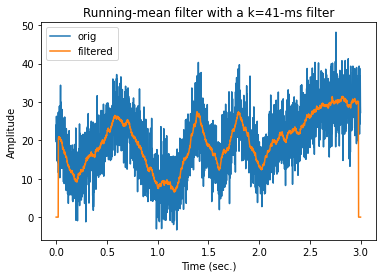

In [2]:
# create signal
srate = 1000  # Hz
time = np.arange(0, 3, 1 / srate)
n = len(time)
p = 15  # poles for random interpolation

# noise level, measured in standard deviations
noiseamp = 5

# amplitude modulator and noise level
ampl = np.interp(np.linspace(0, p, n), np.arange(0, p), np.random.rand(p) * 30)
noise = noiseamp * np.random.randn(n)
signal = ampl + noise

# initialize filtered signal vector
filtsig = np.zeros(n)

# implement the running mean filter
k = 20  # filter window is actually k*2+1
for i in range(k + 1, n - k - 1):
    # each point is the average of k surrounding points
    filtsig[i] = np.mean(signal[i - k : i + k])

# compute window size in ms
windowsize = 1000 * (k * 2 + 1) / srate

plt.figure()
# plot the noisy and filtered signals
plt.plot(time, signal, label="orig")
plt.plot(time, filtsig, label="filtered")

plt.legend()
plt.xlabel("Time (sec.)")
plt.ylabel("Amplitude")
plt.title("Running-mean filter with a k=%d-ms filter" % windowsize)

plt.show()



---
# VIDEO: Gaussian-smooth a time series
---


/var/folders/c4/x03my2dj70s46m109bn58l2m0000gn/T/ipykernel_9475/4226357663.py:11: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  ampl = np.interp(linspace(1, p, n), np.arange(0, p), np.random.rand(p) * 30)


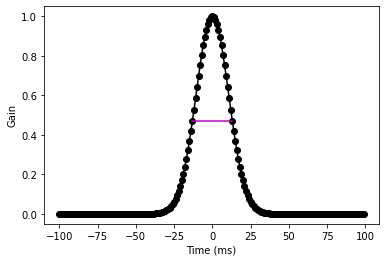

In [3]:
# create signal
srate = 1000  # Hz
time = np.arange(0, 3, 1 / srate)
n = len(time)
p = 15  # poles for random interpolation

# noise level, measured in standard deviations
noiseamp = 5

# amplitude modulator and noise level
ampl = np.interp(linspace(1, p, n), np.arange(0, p), np.random.rand(p) * 30)
noise = noiseamp * np.random.randn(n)
signal = ampl + noise


## create Gaussian kernel
# full-width half-maximum: the key Gaussian parameter
fwhm = 25  # in ms

# normalized time vector in ms
k = 100
gtime = 1000 * np.arange(-k, k) / srate

# create Gaussian window
gauswin = np.exp(-(4 * np.log(2) * gtime**2) / fwhm**2)

# compute empirical FWHM
pstPeakHalf = k + np.argmin((gauswin[k:] - 0.5) ** 2)
prePeakHalf = np.argmin((gauswin - 0.5) ** 2)

empFWHM = gtime[pstPeakHalf] - gtime[prePeakHalf]

plt.figure()
# show the Gaussian
plt.plot(gtime, gauswin, "ko-")
plt.plot(
    [gtime[prePeakHalf], gtime[pstPeakHalf]],
    [gauswin[prePeakHalf], gauswin[pstPeakHalf]],
    "m",
)

# then normalize Gaussian to unit energy
gauswin = gauswin / np.sum(gauswin)
# title([ 'Gaussian kernel with requeted FWHM ' num2str(fwhm) ' ms (' num2str(empFWHM) ' ms achieved)' ])
plt.xlabel("Time (ms)")
plt.ylabel("Gain")

plt.show()


/var/folders/c4/x03my2dj70s46m109bn58l2m0000gn/T/ipykernel_9475/1336532773.py:30: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  filtsigMean[i] = mean(signal[i - mk : i + mk])


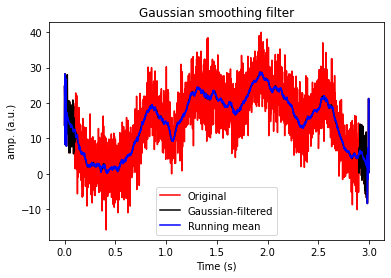

In [4]:
## implement the filter

# initialize filtered signal vector
filtsigG = copy.deepcopy(signal)

# # implement the running mean filter
for i in range(k + 1, n - k - 1):
    # each point is the weighted average of k surrounding points
    filtsigG[i] = np.sum(signal[i - k : i + k] * gauswin)

# plot
plt.plot(time, signal, "r", label="Original")
plt.plot(time, filtsigG, "k", label="Gaussian-filtered")

plt.xlabel("Time (s)")
plt.ylabel("amp. (a.u.)")
plt.legend()
plt.title("Gaussian smoothing filter")

## for comparison, plot mean smoothing filter

# initialize filtered signal vector
filtsigMean = copy.deepcopy(signal)

# implement the running mean filter
# note: using mk instead of k to avoid confusion with k above
mk = 20  # filter window is actually mk*2+1
for i in range(mk + 1, n - mk - 1):
    # each point is the average of k surrounding points
    filtsigMean[i] = mean(signal[i - mk : i + mk])

plt.plot(time, filtsigMean, "b", label="Running mean")
plt.legend()
plt.show()



---
# VIDEO: Gaussian-smooth a spike time series
---


/var/folders/c4/x03my2dj70s46m109bn58l2m0000gn/T/ipykernel_9475/219161673.py:10: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  spikets = np.zeros(int(sum(isi)))


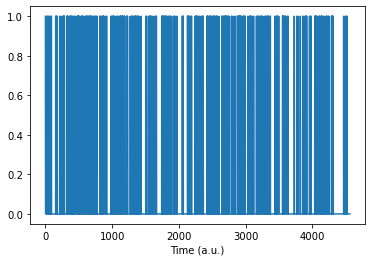

In [5]:
## generate time series of random spikes

# number of spikes
n = 300

# inter-spike intervals (exponential distribution for bursts)
isi = np.round(np.exp(np.random.randn(n)) * 10)

# generate spike time series
spikets = np.zeros(int(sum(isi)))

for i in range(0, n):
    spikets[int(np.sum(isi[0:i]))] = 1


# plot
plt.plot(spikets)
plt.xlabel("Time (a.u.)")
plt.show()


/var/folders/c4/x03my2dj70s46m109bn58l2m0000gn/T/ipykernel_9475/3830027071.py:11: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  gauswin = np.exp(-(4 * log(2) * gtime**2) / fwhm**2)


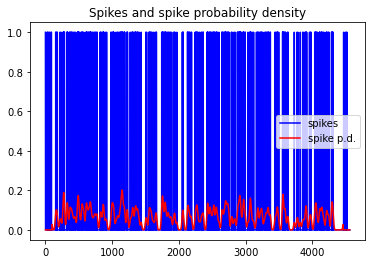

In [6]:
## create and implement Gaussian window

# full-width half-maximum: the key Gaussian parameter
fwhm = 25  # in points

# normalized time vector in ms
k = 100
gtime = np.arange(-k, k)

# create Gaussian window
gauswin = np.exp(-(4 * log(2) * gtime**2) / fwhm**2)
gauswin = gauswin / np.sum(gauswin)

# initialize filtered signal vector
filtsigG = np.zeros(len(spikets))

# implement the weighted running mean filter
for i in range(k + 1, len(spikets) - k - 1):
    filtsigG[i] = np.sum(spikets[i - k : i + k] * gauswin)


# plot the filtered signal (spike probability density)
plt.figure()
plt.plot(spikets, "b", label="spikes")
plt.plot(filtsigG, "r", label="spike p.d.")
plt.legend()
plt.title("Spikes and spike probability density")
plt.show()



---
# VIDEO: Denoising via TKEO
---


/var/folders/c4/x03my2dj70s46m109bn58l2m0000gn/T/ipykernel_9475/3747162112.py:28: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  emgZf = (emgf - np.mean(emgf[0:time0])) / std(emgf[0:time0])


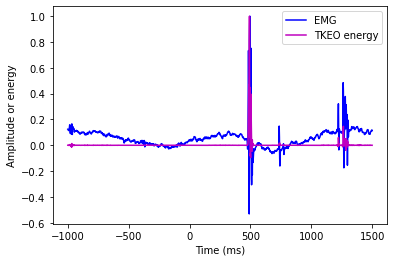

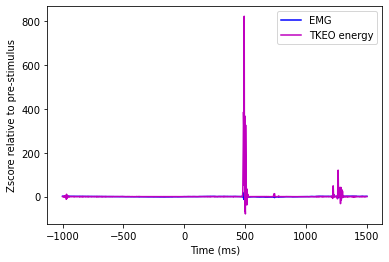

In [7]:
# import data
emgdata = sio.loadmat("emg4TKEO.mat")

# extract needed variables
emgtime = emgdata["emgtime"][0]
emg = emgdata["emg"][0]

# initialize filtered signal
emgf = copy.deepcopy(emg)

# the loop version for interpretability
for i in range(1, len(emgf) - 1):
    emgf[i] = emg[i] ** 2 - emg[i - 1] * emg[i + 1]

# the vectorized version for speed and elegance
emgf2 = copy.deepcopy(emg)
emgf2[1:-1] = emg[1:-1] ** 2 - emg[0:-2] * emg[2:]

## convert both signals to zscore

# find timepoint zero
time0 = np.argmin(emgtime**2)

# convert original EMG to z-score from time-zero
emgZ = (emg - np.mean(emg[0:time0])) / np.std(emg[0:time0])

# same for filtered EMG energy
emgZf = (emgf - np.mean(emgf[0:time0])) / std(emgf[0:time0])


## plot
# plot "raw" (normalized to max.1)
plt.plot(emgtime, emg / np.max(emg), "b", label="EMG")
plt.plot(emgtime, emgf / np.max(emgf), "m", label="TKEO energy")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude or energy")
plt.legend()

plt.show()

# plot zscored
plt.plot(emgtime, emgZ, "b", label="EMG")
plt.plot(emgtime, emgZf, "m", label="TKEO energy")

plt.xlabel("Time (ms)")
plt.ylabel("Zscore relative to pre-stimulus")
plt.legend()
plt.show()



---
VIDEO: Median filter to remove spike noise
---


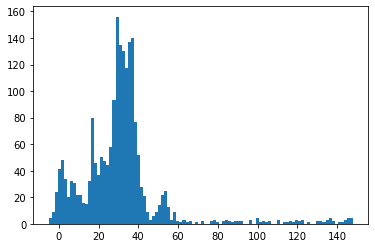

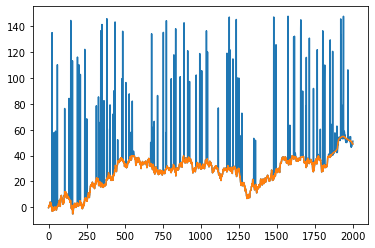

In [8]:
# create signal
n = 2000
signal = np.cumsum(np.random.randn(n))

# proportion of time points to replace with noise
propnoise = 0.05

# find noise points
noisepnts = np.random.permutation(n)
noisepnts = noisepnts[0 : int(n * propnoise)]

# generate signal and replace points with noise
signal[noisepnts] = 50 + np.random.rand(len(noisepnts)) * 100

# use hist to pick threshold
plt.hist(signal, 100)
plt.show()

# visual-picked threshold
threshold = 40

# find data values above the threshold
suprathresh = np.where(signal > threshold)[0]

# initialize filtered signal
filtsig = copy.deepcopy(signal)

# loop through suprathreshold points and set to median of k
k = 20  # actual window is k*2+1
for ti in range(0, len(suprathresh)):

    # lower and upper bounds
    lowbnd = np.max((1, suprathresh[ti] - k))
    uppbnd = np.min((suprathresh[ti] + k, n))

    # compute median of surrounding points
    filtsig[suprathresh[ti]] = np.median(signal[lowbnd:uppbnd])

# plot
plt.figure()
plt.plot(range(0, n), signal, range(0, n), filtsig)
plt.show()



---
# VIDEO: Remove linear trend
---


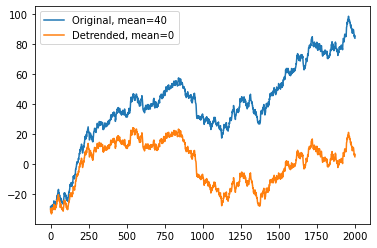

In [9]:
# create signal with linear trend imposed
n = 2000
signal = np.cumsum(np.random.randn(n)) + np.linspace(-30, 30, n)

# linear detrending
detsignal = scipy.signal.detrend(signal)

# get means
omean = np.mean(signal)  # original mean
dmean = np.mean(detsignal)  # detrended mean

# plot signal and detrended signal
plt.plot(range(0, n), signal, label="Original, mean=%d" % omean)
plt.plot(range(0, n), detsignal, label="Detrended, mean=%d" % dmean)

plt.legend()
plt.show()



---
# VIDEO: Remove nonlinear trend with polynomials
---


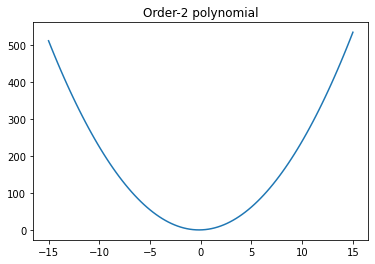

In [10]:
## polynomial intuition

order = 2
x = np.linspace(-15, 15, 100)

y = np.zeros(len(x))

for i in range(0, order + 1):
    y = y + np.random.randn(1) * x**i

plt.plot(x, y)
plt.title("Order-%d polynomial" % order)
plt.show()


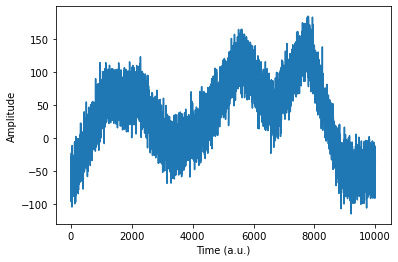

In [11]:
## generate signal with slow polynomial artifact

n = 10000
t = range(0, n)
k = 10  # number of poles for random amplitudes

slowdrift = np.interp(np.linspace(1, k, n), np.arange(0, k), 100 * np.random.randn(k))
signal = slowdrift + 20 * np.random.randn(n)

# plot
plt.plot(t, signal)
plt.xlabel("Time (a.u.)")
plt.ylabel("Amplitude")
plt.show()


/var/folders/c4/x03my2dj70s46m109bn58l2m0000gn/T/ipykernel_9475/1854881370.py:4: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  p = polyfit(t, signal, 3)
/var/folders/c4/x03my2dj70s46m109bn58l2m0000gn/T/ipykernel_9475/1854881370.py:7: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  yHat = polyval(p, t)


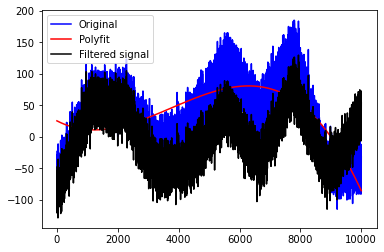

In [12]:
## fit a 3-order polynomial

# polynomial fit (returns coefficients)
p = polyfit(t, signal, 3)

# predicted data is evaluation of polynomial
yHat = polyval(p, t)

# compute residual (the cleaned signal)
residual = signal - yHat

# now plot the fit (the function that will be removed)
plt.plot(t, signal, "b", label="Original")
plt.plot(t, yHat, "r", label="Polyfit")
plt.plot(t, residual, "k", label="Filtered signal")

plt.legend()
plt.show()


/var/folders/c4/x03my2dj70s46m109bn58l2m0000gn/T/ipykernel_9475/116802398.py:13: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  yHat = np.polyval(polyfit(t, signal, orders[ri]), t)
/var/folders/c4/x03my2dj70s46m109bn58l2m0000gn/T/ipykernel_9475/116802398.py:13: RankWarning: Polyfit may be poorly conditioned
  yHat = np.polyval(polyfit(t, signal, orders[ri]), t)
/var/folders/c4/x03my2dj70s46m109bn58l2m0000gn/T/ipykernel_9475/116802398.py:13: RankWarning: Polyfit may be poorly conditioned
  yHat = np.polyval(polyfit(t, signal, orders[ri]), t)
/var/folders/c4/x03my2dj70s46m109bn58l2m0000gn/T/ipykernel_9475/116802398.py:13: RankWarning: Polyfit may be poorly conditioned
  yHat = np.polyval(polyfit(t, signal, orders[ri]), t)
/var/folders/c4/x03my2dj70s46m109bn58l2m0000gn/T/ipykernel_9475/116802398.py:13: RankWarning: Polyfit may be poorly conditioned
  yHat = np.polyval(polyfit(t, signal, orders[ri]), t)
/var/folders/c4/x03my2

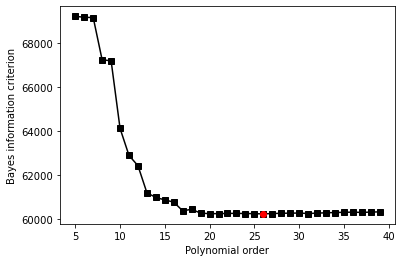

In [13]:
## Bayes information criterion to find optimal order

# possible orders
orders = range(5, 40)

# sum of squared errors (sse is reserved!)
sse1 = np.zeros(len(orders))

# loop through orders
for ri in range(0, len(orders)):

    # compute polynomial (fitting time series)
    yHat = np.polyval(polyfit(t, signal, orders[ri]), t)

    # compute fit of model to data (sum of squared errors)
    sse1[ri] = np.sum((yHat - signal) ** 2) / n


# Bayes information criterion
bic = n * np.log(sse1) + orders * np.log(n)

# best parameter has lowest BIC
bestP = min(bic)
idx = np.argmin(bic)

# plot the BIC
plt.plot(orders, bic, "ks-")
plt.plot(orders[idx], bestP, "ro")
plt.xlabel("Polynomial order")
plt.ylabel("Bayes information criterion")
plt.show()


/var/folders/c4/x03my2dj70s46m109bn58l2m0000gn/T/ipykernel_9475/1213319169.py:4: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  polycoefs = polyfit(t, signal, orders[idx])
/var/folders/c4/x03my2dj70s46m109bn58l2m0000gn/T/ipykernel_9475/1213319169.py:4: RankWarning: Polyfit may be poorly conditioned
  polycoefs = polyfit(t, signal, orders[idx])
/var/folders/c4/x03my2dj70s46m109bn58l2m0000gn/T/ipykernel_9475/1213319169.py:7: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  yHat = polyval(polycoefs, t)


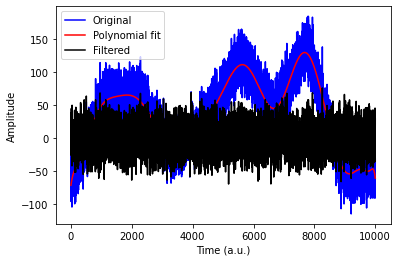

In [14]:
## now repeat filter for best (smallest) BIC

# polynomial fit
polycoefs = polyfit(t, signal, orders[idx])

# estimated data based on the coefficients
yHat = polyval(polycoefs, t)

# filtered signal is residual
filtsig = signal - yHat


## plotting
plt.plot(t, signal, "b", label="Original")
plt.plot(t, yHat, "r", label="Polynomial fit")
plt.plot(t, filtsig, "k", label="Filtered")

plt.xlabel("Time (a.u.)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()



---
# VIDEO: Averaging multiple repetitions (time-synchronous averaging)
---


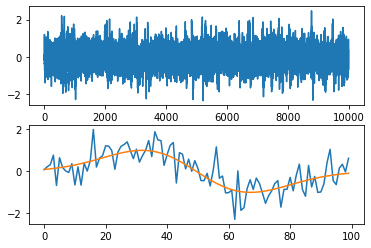

In [15]:
## simulate data

# create event (derivative of Gaussian)
k = 100  # duration of event in time points
event = np.diff(np.exp(-np.linspace(-2, 2, k + 1) ** 2))
event = event / np.max(event)  # normalize to max=1

# event onset times
Nevents = 30
onsettimes = np.random.permutation(10000 - k)
onsettimes = onsettimes[0:Nevents]

# put event into data
data = np.zeros(10000)
for ei in range(0, Nevents):
    data[onsettimes[ei] : onsettimes[ei] + k] = event

# add noise
data = data + 0.5 * np.random.randn(len(data))

# plot data
plt.subplot(211)
plt.plot(data)

# plot one event
plt.subplot(212)
plt.plot(range(0, k), data[onsettimes[3] : onsettimes[3] + k])
plt.plot(range(0, k), event)
plt.show()


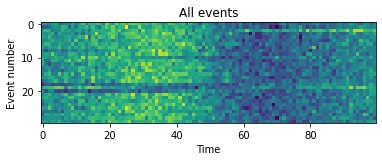

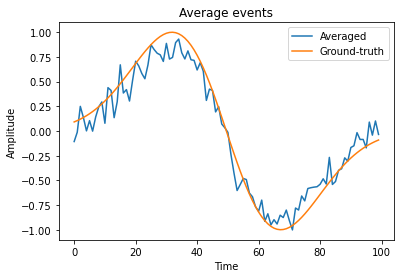

In [16]:
## extract all events into a matrix

datamatrix = np.zeros((Nevents, k))

for ei in range(0, Nevents):
    datamatrix[ei, :] = data[onsettimes[ei] : onsettimes[ei] + k]

plt.imshow(datamatrix)
plt.xlabel("Time")
plt.ylabel("Event number")
plt.title("All events")
plt.show()

plt.plot(range(0, k), np.mean(datamatrix, axis=0), label="Averaged")
plt.plot(range(0, k), event, label="Ground-truth")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Average events")
plt.show()



---
# VIDEO: Remove artifact via least-squares template-matching
---


In [17]:
# load dataset
matdat = sio.loadmat("templateProjection.mat")
EEGdat = matdat["EEGdat"]
eyedat = matdat["eyedat"]
timevec = matdat["timevec"][0]
MN = np.shape(EEGdat)  # matrix sizes

# initialize residual data
resdat = np.zeros(np.shape(EEGdat))


# loop over trials
for triali in range(0, MN[1]):

    # build the least-squares model as intercept and EOG from this trial
    X = np.column_stack((np.ones(MN[0]), eyedat[:, triali]))

    # compute regression coefficients for EEG channel
    b = np.linalg.solve(
        np.matrix.transpose(X) @ X, np.matrix.transpose(X) @ EEGdat[:, triali]
    )

    # predicted data
    yHat = X @ b

    # new data are the residuals after projecting out the best EKG fit
    resdat[:, triali] = EEGdat[:, triali] - yHat


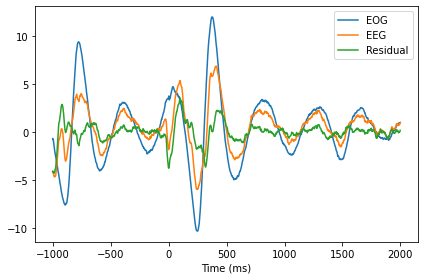

In [18]:
### plotting

# trial averages
plt.figure()
plt.plot(timevec, np.mean(eyedat, axis=1), label="EOG")
plt.plot(timevec, np.mean(EEGdat, axis=1), label="EEG")
plt.plot(timevec, np.mean(resdat, 1), label="Residual")

plt.xlabel("Time (ms)")
plt.legend()
plt.tight_layout()
plt.show()


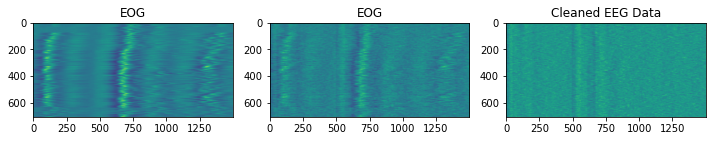

In [19]:
# show all trials in a map
clim = [-1, 1] * 20

plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(eyedat.T)
plt.title("EOG")


plt.subplot(132)
plt.imshow(EEGdat.T)
plt.title("EOG")


plt.subplot(133)
plt.imshow(resdat.T)
plt.title("Cleaned EEG Data")
plt.tight_layout()
plt.show()
